# K-Nearest Neighbor (KNN)



### **- 개념**

최 근접 이웃은 지도 학습 알고리즘 중 하나이다. 어떤 데이터가 주어지면 주변의 데이터를 살펴본 뒤 더 많은 데이터가 포함되어 있는 범주로 분류하는 방식이다.

새로운 데이터가 주어졌을때 이를 class A로 분류할지 class B로 분류할지 판단하는 문제이다. k=3일 때, k가 3이라는 것은 가장 가까운 주변의 3개 데이터를본 뒤, 3개의 주변 데이터가 많이 포함 되어 있는 범주로 분류하겠다는 거다.


출처:https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-6-K-%EC%B5%9C%EA%B7%BC%EC%A0%91%EC%9D%B4%EC%9B%83KNN

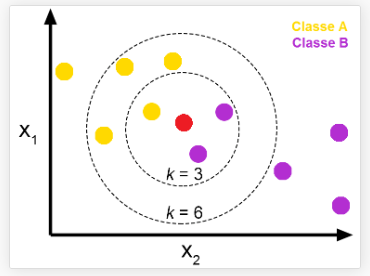

### **- 작동 방식**

k=3을 예시로 들자면,

1. 처음에는 아주 가까운 데이터 포인트를 기준으로 찾습니다.(일반적으로 **유클리디안 거리**를 사용한다.)

2. 데이터가 부족하면 조금 더 범위를 넓혀가며 추가로 이웃을 찾습니다.

3. 데이터 포인트를 3개 선택할 때까지 이 과정을 반복합니다.

4. 가장 가까운 3개의 데이터를 본 뒤, 3개의 데이터 중 더 많이 포함되어 있는 범주로 분류하게 된다.
  
  -> 위에 그림을 예로 들자면, 빨간점 범위 안에 노란색 점 1개, 보라색 점 2개가 있다. 따라서 빨간 점은 보라색 점으로 분류가 된다.

### **- Problem**

1. KNN Classification을 사용하여 붓꽃 데이터를 분류해보자.

2. 분류를 시각화 해보자.



### **- Result**

훈련 데이터셋에 있는 값들과 테스트 데이터셋에 대한 결과 값들을 matplot 라이브러리를 통해서 시각화 하는데 성공했다.

마커 종류 참조: https://wikidocs.net/92083

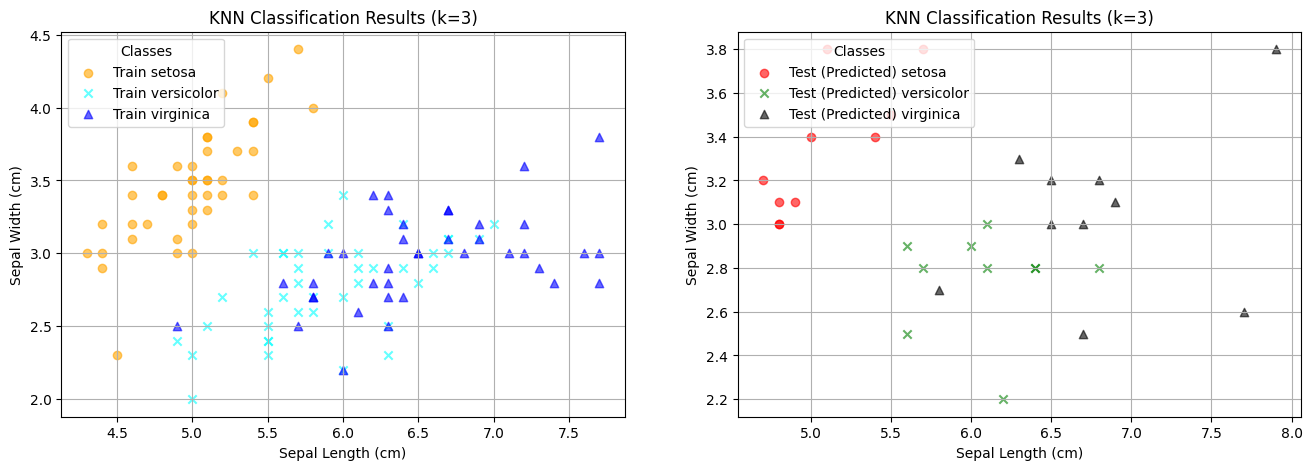

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 1. 데이터 준비
iris = load_iris()
X = iris.data[:, :2]  # 첫 두 개의 특성만 사용 (sepal length, sepal width)
# print(iris)
# print(iris.data[:])
# print(iris.data[:, :2])

y = iris.target       # 타겟 데이터

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. KNN 모델 학습
knn = KNeighborsClassifier(n_neighbors=3)  # K=3
knn.fit(X_train, y_train)

# 3. 테스트 세트에 대한 예측
y_pred = knn.predict(X_test)



# 각 클래스별로 다른 마커와 색상 설정
markers = ['o', 'x', '^']
colors = ['orange', 'cyan', 'blue']
result_colors = ['red', 'green', 'black']
classes = iris.target_names
# print(classes)
#print(X_train)
# print(X_train[0,1])
#print(y_train)

# 훈련 데이터 산점도
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
for i, class_name in enumerate(classes):
    plt.scatter(X_train[y_train  == i, 0], X_train[y_train == i, 1],
                marker=markers[i], color=colors[i], label=f"Train {class_name}", alpha=0.6)
# 그래프 설정
plt.title("KNN Classification Results (k=3)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper left", title="Classes")
plt.grid(True)


# 테스트 데이터 산점도 (예측값 기준으로 표시)
plt.subplot(1, 2, 2)
for i, class_name in enumerate(classes):
    plt.scatter(X_test[y_pred == i, 0], X_test[y_pred == i, 1],
                marker=markers[i], color=result_colors[i], label=f"Test (Predicted) {class_name}", alpha=0.6)
# 그래프 설정
plt.title("KNN Classification Results (k=3)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper left", title="Classes")
plt.grid(True)
plt.show()






초기 데이터

- X_train: 데이터의 특징(feature) 좌표. 각 행은 데이터 포인트의 (x, y) 좌표로 나타냅니다.
- 예: 첫 번째 데이터는 [4.6, 3.6], 두 번째 데이터는 [5.7, 4.4], ...
y_train: 데이터의 클래스(label). 각 데이터 포인트가 속한 클래스가 저장되어 있습니다.
- 예: 첫 번째 데이터는 클래스 0, 두 번째 데이터는 클래스 0, ...
반복문 구조

enumerate(classes)
-classes는 클래스 이름 리스트입니다. 예를 들어, classes = ['class_0', 'class_1', 'class_2']라고 가정합니다.

- enumerate(classes)는 클래스 이름과 해당 인덱스를 반환합니다:
  
  첫 번째 반복: i = 0, class_name = 'class_0'

  두 번째 반복: i = 1, class_name = 'class_1'

  세 번째 반복: i = 2, class_name = 'class_2'

  - y_train == i 동작

    y_train == i는 y_train 배열에서 값이 i인 인덱스만 True로 반환하는 조건식입니다.

예시로 확인
- 첫 번째 반복 (i = 0):

  y_train == 0 → [True, True, False, True, True, False, ...]
True인 위치는 클래스 0에 해당하는 데이터의 인덱스입니다.
클래스 0의 데이터 인덱스: [0, 1, 3, 4, 7, ...]

- 두 번째 반복 (i = 1):

  y_train == 1 → [False, False, True, False, False, True, ...]
True인 위치는 클래스 1에 해당하는 데이터의 인덱스입니다.
클래스 1의 데이터 인덱스: [2, 6, 11, 16, ...]

- 세 번째 반복 (i = 2):

  y_train == 2 → [False, False, False, False, False, False, True, ...]
True인 위치는 클래스 2에 해당하는 데이터의 인덱스입니다.
클래스 2의 데이터 인덱스: [5, 10, 13, 22, ...]

---------------------------------------------------------------------------

X_train[y_train == i, 0]와 X_train[y_train == i, 1] 동작
- 첫 번째 반복 (i = 0):
  - y_train == 0 조건에 따라 X_train에서 클래스 0의 데이터만 선택합니다.

  - X_train[y_train == 0, 0]:
    
    X_train에서 클래스 0 데이터의 첫 번째 열(x축 좌표) 값만 선택.
    
    결과: [4.6, 5.7, 4.8, 4.4, 5.2, ...]
  - X_train[y_train == 0, 1]:
    
    X_train에서 클래스 0 데이터의 두 번째 열(y축 좌표) 값만 선택.
    
    결과: [3.6, 4.4, 3.4, 3.2, 3.5, ...]

- 두 번째 반복 (i = 1):

  - y_train == 1 조건에 따라 X_train에서 클래스 1의 데이터만 선택합니다.
  
  - X_train[y_train == 1, 0]:
  
    결과: [6.7, 6.4, 6.3, 6.1, ...]

  - X_train[y_train == 1, 1]:

    결과: [3.1, 3.2, 2.8, 2.9, ...]


- 세 번째 반복 (i = 2):

  - y_train == 2 조건에 따라 X_train에서 클래스 2의 데이터만 선택합니다.
  - X_train[y_train == 2, 0]:
  
    결과: [6.3, 6.7, 7.2, ...]

  - X_train[y_train == 2, 1]:
  
    결과: [2.5, 2.7, 3.6, ...]

